# Data Pre-Processing and Exploratory Data Analysis

### Import the Data

Import all libraries needed for the project, and import the data into a dataframe. 

In [157]:
# Importing needed libraries 
%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor


# Import the dataset
dataset = pd.read_csv("data/train.csv")
# Create dataframe
df = pd.DataFrame(dataset)
# Check dataset
df.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


### Remove Missing Values 

Remove the missing values 

In [158]:
# 1. Remove missing values: All our missing data is marked with -1, so remove every row that has a -1 in it: 
df = df.replace(-1, np.NaN) # replace the -1 values with NaN, since they indicate missing data
df.dropna(inplace=True)

### Split into Train and Testing Sets

In [159]:
# 2. Split into train and testing data 
X = df.iloc[:, 2:] # dropping the id and target columns
y = df["target"] # just the target column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

### Removing Outliers

Removes all outliers from `X_train` and `y_train`. 

In [160]:
# 3. Remove outliers: It depends on what you exactly need for your use-case, but if you remove outliers after standardizing, the resulting data won't be standardized anymore (if many outliers are removed, standard deviation could become considerably smaller than 1)
# identify outliers in the training dataset
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred = clf.fit_predict(X_train) # Label is 1 for an inlier and -1 for an outlier
# select all rows that are not outliers
inlier_indexes = y_pred == 1

# Remove from X_train and y_train
X_train, y_train = X_train[inlier_indexes], y_train[inlier_indexes]

### Training with the Unsupervised model (Kmeans model)

In [161]:
# 4 Apply K-means clustering directly to the features
# Importing needed libraries 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


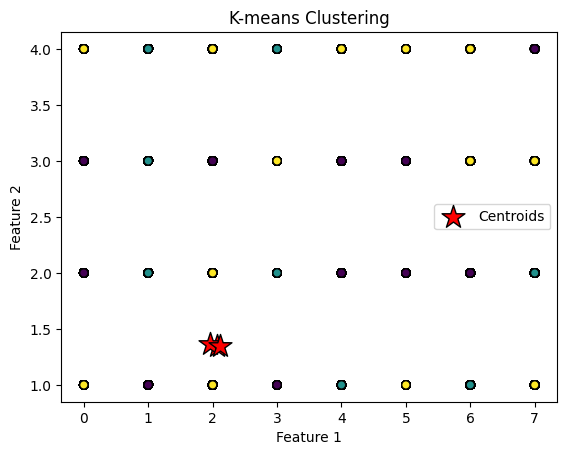

In [162]:

# Choose the number of clusters 
num_clusters = 3

# Fit KMeans to the original data (without scaling)
kmeans = KMeans(n_clusters=num_clusters, random_state=1)
cluster_labels = kmeans.fit_predict(X) #use X (before splitting the data) or X_train

# Create a new dataframe for clustered data
df_clustered = df.copy()

# Add the cluster labels to the dataframe using X_train's or X's index
df_clustered['Cluster'] = pd.Series(cluster_labels, index=X.index)

# Visualize the clustering results (for two features, you can modify this based on your dataset)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=cluster_labels, cmap='viridis', edgecolors='k', marker='o')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, marker='*', c='red', edgecolors='black', label='Centroids')
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


In [163]:
from sklearn.metrics import silhouette_score

# Evaluate the Silhouette Score
silhouette_avg = silhouette_score(X, cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.475100250343067
